In [68]:
#imports
import random
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

[0.21760077176688164, 0.6422536234699076, 0.08358916437841302, 0.18743462930144428, 0.33821341140965044, 0.43868669977624086, 0.9612834644659947, 0.27302298594103214, 0.4787729776435077, 0.3116389752774178, 0.6352464372050447, 0.9674683016096475, 0.11926535867761212, 0.011556665943654232, 0.7841259176689895, 0.2431572566173552, 0.031175441640407753, 0.5946856587394694, 0.9848937719282604, 0.1623619822384118] [0.3443807346030824, 0.36413206493253214, 0.5040914040192876, 0.8842252761132199, 0.6831893779825265, 0.631720169863281, 0.17710776593939626, 0.041790465795723986, 0.34746757800423, 0.1251868083965234, 0.5856658850599622, 0.8870104434498497, 0.5963206301457431, 0.29163887516143816, 0.9888720099104378, 0.03467048460457833, 0.16540957113621935, 0.7074132949042521, 0.9157336006624457, 0.6205264673592805]


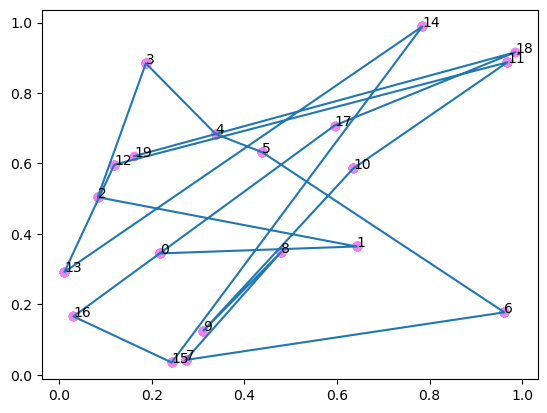

In [69]:
#my starting points
seed = 1111
point_num = 20
x,y = [], []

random.seed(seed)
for i in range(point_num):
    a = random.random()
    b = random.random()
    x.append(a)
    y.append(b)
    plt.scatter(x,y, color = 'violet')
    plt.text(a,b,i)


print(x,y)
plt.plot(x,y)

In [70]:
#random starting population
import pandas as pd

all_population = list(range(1, point_num+1))
#random.seed(seed)
population_size = 270
print(all_population)

population = []
for i in range(1, population_size):
    start_population = random.sample(all_population, point_num)
    population.append(start_population)

population_df = pd.DataFrame(population)

print(population_df)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
     0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    17  18   8   6  10   3  19  14  13   7  16  12   4  15   1   9   2  20   
1    10   5   8   6  19  11  15   2  20   9  17  14  16  18   1   4   3  12   
2    19   4   2   6   9   5   3  20  13  16  10  14  12  17  11  15   1   8   
3    20  11  14   6  10   4  15   1   3  17   7   5   2  12  18  16   8  19   
4     3  18  10  19  11  17  12   7  20   5  15   9   4  16   1  13  14   2   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
264   7  18   8   5  14   4   3   9  13  11  19  15  17   6  10  12  20   1   
265  13  14   8   1   6  11   2   4  17   7  12  19  10  18   5  16  15   9   
266  12   9   4  11  14  19  20   5   7  17   1  13  15  18  16   3  10   2   
267  10   9  16  11  15   6   5   8   1   7  13  18   3  19   2  17  20  12   
268  16  11   6  19  15  20   2   3   9  13   7   4  17   5

In [71]:
#function of cost
import numpy as np

def cost_calculation(population_df):
    cost_function_df = []
    #for each row calculate the distance between points
    for index, row in population_df.iterrows():
        route = row.values.astype(int)
        cost_function = []
        for i in range(len(route) - 1):
            #distance for each shuffled element
            cost_function.append(np.sqrt((x[route[i+1] - 1] - x[route[i] - 1])**2 + (y[route[i+1] - 1] - y[route[i] - 1])**2))
        #comeback from last point to first to close the route
        cost_function.append(np.sqrt((x[route[0] - 1] - x[route[-1] - 1])**2 + (y[route[0] - 1] - y[route[-1] - 1])**2)) 
        #for each row i have a sum of distances
        cost_function_df.append(np.sum(cost_function))

    cost_function_df = pd.DataFrame(cost_function_df, columns=['route_len'])
    print(cost_function_df)
    return cost_function_df

cost_function_df = cost_calculation(population_df)

     route_len
0    12.962155
1    11.571380
2    10.771977
3    11.383854
4    12.177524
..         ...
264  11.690660
265   9.942228
266  12.304276
267  11.424862
268  12.499574

[269 rows x 1 columns]


In [72]:
def cost_append(population_df, cost_function_df):
    #add cost and rank score to the population table
    population_df['route_len'] = cost_function_df['route_len']
    population_df['score'] = population_df['route_len'].sort_values(ascending=False).rank()
    #from best to last
    population_df = population_df.sort_values('score')
    print(population_df)
    return population_df

population_df = cost_append(population_df, cost_function_df)

      0   1   2   3   4   5   6   7   8   9  ...  12  13  14  15  16  17  18  \
160   5   7   2   4  11  12  15  19  16  18  ...  14  13  20   8  10   1   6   
109  20   2  11   5   7   8   4   6  19  12  ...  14  10   9   1  16  17  13   
123   2   4   3  18  20  13   6   5  12  19  ...  10  11  17  16   7   8   1   
135  19   5  20   1  10   8  17   3  12  11  ...   7  16   9   6   4   2  18   
50    7  20  13   9  15   6   4   8  16  17  ...  11  19  18   5   3   1  14   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
57   16  11   3  19   9  15  14   5  17   2  ...   8  20   4  12  13   7   1   
0    17  18   8   6  10   3  19  14  13   7  ...   4  15   1   9   2  20  11   
159  16  11   6  13   3   8  20  19  17  15  ...   7  18   1   5  10  12   2   
17    9  13   2   5   4   3  11  20   8  10  ...  19  16  15   1  12   6  14   
26   11   5   2  16  20  15  10  12   3   1  ...  13   6  14  18   8   4   9   

     19  route_len  score  
160   9   8

In [73]:
#selection - roulette
def roulette(population_df):
    func = 1 / population_df['route_len']
    probabilities = func / func.sum()
    return probabilities.values

probabilities = roulette(population_df)

In [74]:
#start of the algorithm

def cross(population_df, probabilities):
    iter_num = 0
    num_to_pick = 25
    #np.random.seed(seed)
    #random.seed(seed)
    cross = 10
    children_population = []
    
    while iter_num < num_to_pick:

        #choose new population 
        chosen_id = np.random.choice(population_df.index, size=num_to_pick, p=probabilities, replace=False)
        chosen_population = population_df.iloc[chosen_id]
        #print(chosen_population)

        #cross parents
        for _ in range(cross):
            first_id, second_id = random.sample(list(chosen_id), 2)
            locus_start = random.randint(0, point_num - 1)
            locus_end = random.randint(0, point_num - 1)

            if locus_start > locus_end:
                locus_start, locus_end = locus_end, locus_start
            
            #choose part of gene to cross
            to_exchange = population_df.iloc[first_id][locus_start:locus_end]
            to_exchange_id = to_exchange.index
            #print(to_exchange)

            #exchanging it with
            exchange_with = population_df.iloc[second_id].iloc[0:point_num]

            #child initialization
            child = len(exchange_with) * [0]

            child1= []
            child2 = []
            for el in exchange_with.values:
                if el in to_exchange.values:
                    child1.append(el)
                else:
                    child2.append(el)

            child = child2[:locus_start]
            child.extend(to_exchange)
            child += child2[locus_start:]

            children_population.append(child)
        
        iter_num += 1

    children_population = pd.DataFrame(children_population)
    print(children_population)
    return children_population

children_population = cross(population_df, probabilities)

       0     1     2     3     4     5     6     7     8     9     10    11  \
0    10.0  17.0  18.0   4.0   6.0  12.0   1.0   3.0  11.0   8.0  15.0   2.0   
1    10.0  20.0   2.0  12.0   1.0  11.0   8.0  17.0   9.0  14.0   4.0  15.0   
2    20.0  15.0   4.0   2.0   9.0  19.0  14.0   7.0  17.0  18.0   8.0   1.0   
3    18.0   9.0   8.0   6.0   2.0   7.0  11.0  12.0   4.0   3.0   1.0   5.0   
4     6.0  10.0   9.0  16.0  19.0   1.0   7.0  18.0  11.0  13.0  12.0   3.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
245  10.0  18.0   2.0   1.0   4.0  17.0   6.0  14.0  19.0   5.0   8.0   9.0   
246  19.0   1.0  16.0  12.0   6.0  11.0  18.0   9.0  14.0   5.0   3.0  10.0   
247  18.0   3.0  11.0   7.0   4.0  16.0  19.0   5.0  10.0  15.0  13.0  17.0   
248  15.0   5.0  13.0   4.0  11.0  14.0   6.0  16.0   1.0  12.0  18.0   9.0   
249  10.0  14.0   2.0   1.0   3.0  19.0  16.0  20.0   5.0  13.0  18.0  12.0   

       12    13    14    15    16    17    18    19

In [75]:
#mutation
def mutate(children_population):
    #random.seed(seed)

    for idx, row in children_population.iterrows():
        chromosome = list(row)
        option = random.randint(1, 2)
        
        locus1 = random.randint(0, point_num - 1)
        locus2 = random.randint(0, point_num - 1)

        match option:
            case 1:
                # changing 2 places
                chromosome[locus1], chromosome[locus2] = chromosome[locus2], chromosome[locus1]

            case 2:
                # changing whole subset
                gene = chromosome.pop(locus1)
                chromosome.insert(locus2, gene)

        #replacing
        children_population.loc[idx] = chromosome
                
    print(children_population)        
    return children_population

children_population_mutated = mutate(children_population)

       0     1     2     3     4     5     6     7     8     9     10    11  \
0    10.0  17.0  18.0   4.0   6.0  12.0   1.0   3.0  11.0   8.0  15.0   2.0   
1    10.0  20.0   2.0  12.0   1.0  11.0   8.0  17.0   9.0  14.0   4.0  15.0   
2    20.0   4.0   2.0   9.0  19.0  14.0   7.0  17.0  18.0   8.0   1.0  16.0   
3    18.0   9.0   8.0   6.0   2.0   7.0  11.0  12.0   4.0   3.0   1.0   5.0   
4     6.0  10.0   9.0  16.0  19.0   1.0   7.0  18.0   5.0  11.0  13.0  12.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
245  10.0  18.0   2.0   1.0  19.0  17.0   6.0  14.0   4.0   5.0   8.0   9.0   
246  19.0   1.0  16.0  12.0   6.0  11.0  17.0   9.0  14.0   5.0   3.0  10.0   
247  18.0   3.0  11.0   6.0   4.0  16.0  19.0   5.0  10.0  15.0  13.0  17.0   
248  15.0   5.0  13.0   4.0  11.0  14.0   6.0  16.0   1.0  12.0  18.0   9.0   
249  10.0  14.0   2.0   1.0  17.0  19.0  16.0  20.0   5.0  13.0  18.0  12.0   

       12    13    14    15    16    17    18    19

In [76]:
def recreation(population_df, children_population_mutated):
    best_of = 20
    better_population = pd.concat([population_df.iloc[:best_of, :20], children_population_mutated], ignore_index=True)
    cost_function_df = cost_calculation(better_population)
    population_df = cost_append(better_population, cost_function_df)
    probabilities = roulette(population_df)
    children_population = cross(population_df, probabilities)
    children_population_mutated = mutate(children_population)
    return population_df, children_population_mutated

def best_solution(population_df, children_population_mutated):
    population_df, children_population_mutated = recreation(population_df, children_population_mutated)
    return population_df.iloc[0], population_df, children_population_mutated


     route_len
0     8.510658
1     8.531999
2     8.593353
3     8.665330
4     8.705388
..         ...
265  13.177449
266  11.779229
267  11.728646
268  10.162452
269  11.462077

[270 rows x 1 columns]
        0     1     2     3     4     5     6     7     8     9  ...    12  \
0     5.0   7.0   2.0   4.0  11.0  12.0  15.0  19.0  16.0  18.0  ...  14.0   
1    20.0   2.0  11.0   5.0   7.0   8.0   4.0   6.0  19.0  12.0  ...  14.0   
2     2.0   4.0   3.0  18.0  20.0  13.0   6.0   5.0  12.0  19.0  ...  10.0   
3    19.0   5.0  20.0   1.0  10.0   8.0  17.0   3.0  12.0  11.0  ...   7.0   
4     7.0  20.0  13.0   9.0  15.0   6.0   4.0   8.0  16.0  17.0  ...  11.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
24    6.0  10.0   9.0  16.0  19.0   1.0   7.0  18.0   5.0  11.0  ...   3.0   
265  10.0  18.0   2.0   1.0  19.0  17.0   6.0  14.0   4.0   5.0  ...  13.0   
61   11.0   5.0   2.0  16.0  20.0  15.0  10.0  12.0   3.0  19.0  ...  13.0   
219   1.0  19.0 

MovieWriter imagemagick unavailable; using Pillow instead.


       0     1     2     3     4     5     6     7     8     9     10    11  \
0    19.0   2.0  10.0   8.0   9.0  16.0  17.0   7.0  13.0  20.0   3.0  14.0   
1    12.0   9.0  10.0   2.0  16.0  17.0  15.0  14.0  19.0   1.0   7.0  13.0   
2    19.0   7.0   2.0  18.0  12.0  14.0  16.0  10.0   6.0   5.0   9.0  20.0   
3    15.0   2.0   9.0   8.0   7.0  10.0   4.0  16.0  17.0  13.0  20.0   3.0   
4     7.0  19.0  11.0   9.0   1.0  10.0  12.0   8.0  16.0   5.0  17.0   2.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
245  19.0  12.0   3.0   7.0   2.0   9.0  10.0   8.0  16.0  17.0  14.0  18.0   
246  15.0  12.0   7.0   2.0   9.0   8.0  17.0  14.0   1.0   3.0  13.0  19.0   
247  15.0  11.0  12.0  17.0  19.0   7.0   2.0   9.0  10.0  18.0   8.0  16.0   
248   7.0  15.0  18.0   2.0   9.0  16.0   1.0  10.0   8.0  17.0  14.0   3.0   
249  19.0  12.0   7.0   9.0   1.0  10.0   8.0  16.0  17.0  14.0   3.0  13.0   

       12    13    14    15    16    17    18    19

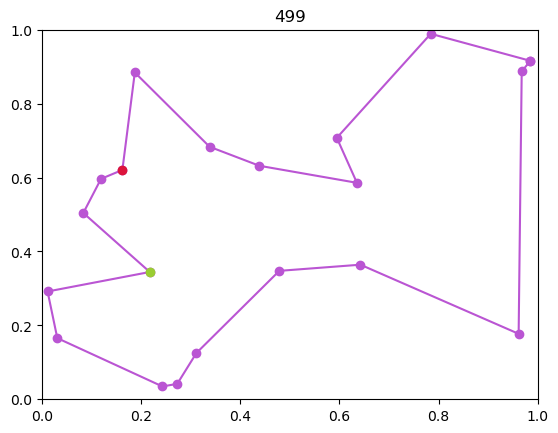

In [77]:
best_array = []
for i in range(500):
    best, population_df, children_population_mutated = best_solution(population_df, children_population_mutated)
    best_array.append(best)

print(len(best_array))

x = np.array(x)
y = np.array(y)

#plot of route upgrade in time(iteration num)
fig, ax = plt.subplots()
ax.scatter(x[0], y[0], color='yellowgreen', zorder = 5)
ax.scatter(x[point_num - 1], y[point_num - 1], color='crimson', zorder = 5)

def animate(i):
    best = best_array[i]
    order = best.iloc[:point_num].astype(int) - 1

    route_x = x[order]
    route_y = y[order]
    route_x = np.append(route_x, route_x[0])
    route_y = np.append(route_y, route_y[0])

    line.set_data(route_x, route_y)
    ax.set_title(i)

    return line,


line, = ax.plot([], [], marker='o', color='mediumorchid')

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])


ani = FuncAnimation(fig, animate, frames=len(best_array), interval=500)
ani.save('route.gif', writer='imagemagick')
plt.show()

       0     1    2    3    4     5    6     7     8     9  ...    12    13  \
38  19.0  12.0  7.0  2.0  9.0  10.0  8.0  16.0  17.0  14.0  ...  13.0  20.0   
0   19.0  12.0  7.0  2.0  9.0  10.0  8.0  16.0  17.0  14.0  ...  13.0  20.0   
0   19.0  12.0  7.0  2.0  9.0  10.0  8.0  16.0  17.0  14.0  ...  13.0  20.0   
0   19.0  12.0  7.0  2.0  9.0  10.0  8.0  16.0  17.0  14.0  ...  13.0  20.0   
0   19.0  12.0  7.0  2.0  9.0  10.0  8.0  16.0  17.0  14.0  ...  13.0  20.0   
..   ...   ...  ...  ...  ...   ...  ...   ...   ...   ...  ...   ...   ...   
0   19.0  12.0  7.0  2.0  9.0  10.0  8.0  16.0  17.0  14.0  ...  13.0  20.0   
0   19.0  12.0  7.0  2.0  9.0  10.0  8.0  16.0  17.0  14.0  ...  13.0  20.0   
0   19.0  12.0  7.0  2.0  9.0  10.0  8.0  16.0  17.0  14.0  ...  13.0  20.0   
0   19.0  12.0  7.0  2.0  9.0  10.0  8.0  16.0  17.0  14.0  ...  13.0  20.0   
0   19.0  12.0  7.0  2.0  9.0  10.0  8.0  16.0  17.0  14.0  ...  13.0  20.0   

     14   15   16    17    18    19  route_len  sco

Text(0, 0.5, 'Cost')

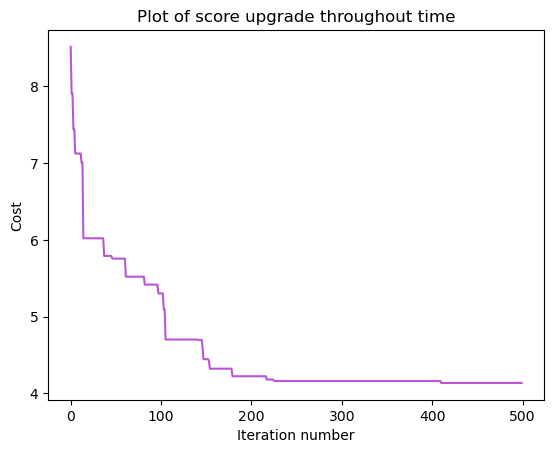

In [78]:
#plot of score upgrade in time(iteration num)
best_array_df = pd.DataFrame(best_array)
print(best_array_df[best_array_df['route_len'] == best_array_df['route_len'].min()])
plt.plot(np.arange(0, len(best_array_df['route_len'])), best_array_df['route_len'], color = "mediumorchid")
plt.title("Plot of score upgrade throughout time")
plt.xlabel('Iteration number')
plt.ylabel('Cost')